In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


# About Database
This dataset comprises a diverse range of attributes associated with customer shopping preferences, providing crucial insights for businesses aiming to deepen their comprehension of their customer demographic. The included features encompass customer age, gender, purchase amounts, favored payment methods, purchase frequency, and feedback ratings. Furthermore, the dataset incorporates information on the types of items bought, shopping frequencies, preferred seasons for shopping, and engagements with promotional offers. Boasting a compilation of 3,900 records, this dataset serves as a cornerstone for businesses seeking to leverage data-driven insights to enhance decision-making and formulate customer-centric strategies.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
#Converting 'Customer ID' from integer to string
df['Customer ID']=df['Customer ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   object 
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
#Statistical analysis
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


From the above analysis it is clear that this database is very balanced. It does not have any null or missing values. The changes of outliers are nearly zero.

In [7]:
#Checking the unique values of the dataframe
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

# Data Analysis & Visualization

In this segment we will try to evaluate the data by answering few questions.

1.What is the overall distribution of customer ages in the dataset?

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64


<Axes: xlabel='Age_category', ylabel='count'>

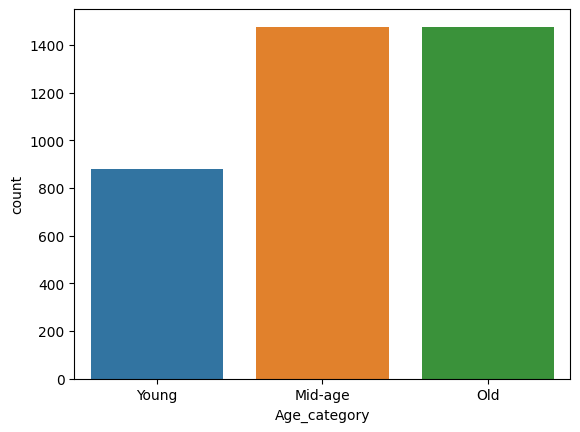

In [8]:
print(df['Age'].value_counts())
#we are cutting the age into some category and storing in the different column
df['Age_category']= pd.cut(df['Age'], bins=[18,30,50,70], labels=['Young', 'Mid-age', 'Old'])
sns.countplot(data=df,x='Age_category')

The presence of a mode at 69 years and an average of 44 years implies a right-skewed or positively skewed distribution. In such a distribution, there is a longer tail on the right side, indicating that there may be a larger number of older customers compared to younger ones.

2. How does the average purchase amount vary across different product categories?

In [9]:
avg=df.groupby('Category')['Purchase Amount (USD)'].mean()
avg

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

Customers tend to spend a similar amount regardless of the specific category of the product they are purchasing

3. Which gender has the highest number of purchases?

In [10]:
df.groupby('Gender')['Purchase Amount (USD)'].count()

Gender
Female    1248
Male      2652
Name: Purchase Amount (USD), dtype: int64

Male customers has highest no of purchase than female

4. What are the most commonly purchased items in each category?

In [11]:
df.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Sunglasses        161
             Belt              161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Pants             171
             Blouse            171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

* The most commonly purchased item in the Accessories category is jewelry. 
* Within the Clothing category, the most commonly purchased items are pants and blouses. 
* The most commonly purchased item in the Footwear category is sandals.
* The most commonly purchased items in the Outerwear category are jackets and coats.
* Conclusion: By understanding the common preferences of customers, businesses can tailor their inventory and marketing strategies to meet the demands of their target audience more effectively

5. Are there any specific seasons or months where customer spending is significantly higher?

In [12]:
df['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In Spring, customer purchased slightly more products than other times.

6. Highest selling item in each seasons?

In [13]:
df.groupby('Season')['Item Purchased'].value_counts().sort_values(ascending=False)[:8]

Season  Item Purchased
Fall    Jacket            54
Spring  Sweater           52
Winter  Sunglasses        52
        Pants             51
        Shirt             50
Fall    Hat               50
Summer  Pants             50
Winter  Hoodie            48
Name: count, dtype: int64

7. What is the average rating given by customers for each product category?

In [14]:
df.groupby('Category')['Review Rating'].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

This finding suggests that, on average, customers tend to provide a similar rating of 3.7 for products in different categories. This uniformity in average ratings indicates that customers perceive the quality or satisfaction level of products across various categories to be relatively consistent.

8. Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [15]:
print(df['Subscription Status'].value_counts())
print(df.groupby('Subscription Status')['Purchase Amount (USD)'].sum())

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64
Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64


This database has almost double no of non-subscriber customer than subscriber. Non-subscriber purchased more than the other.

9. Which payment method is the most popular among customers?

In [16]:
df['Payment Method'].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

Paypal is most popular among customer

10. Do customers who use promo codes tend to spend more than those who don't?

In [17]:
df.groupby('Promo Code Used')['Purchase Amount (USD)'].count()

Promo Code Used
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64

11. How does the frequency of purchases vary across different age groups?

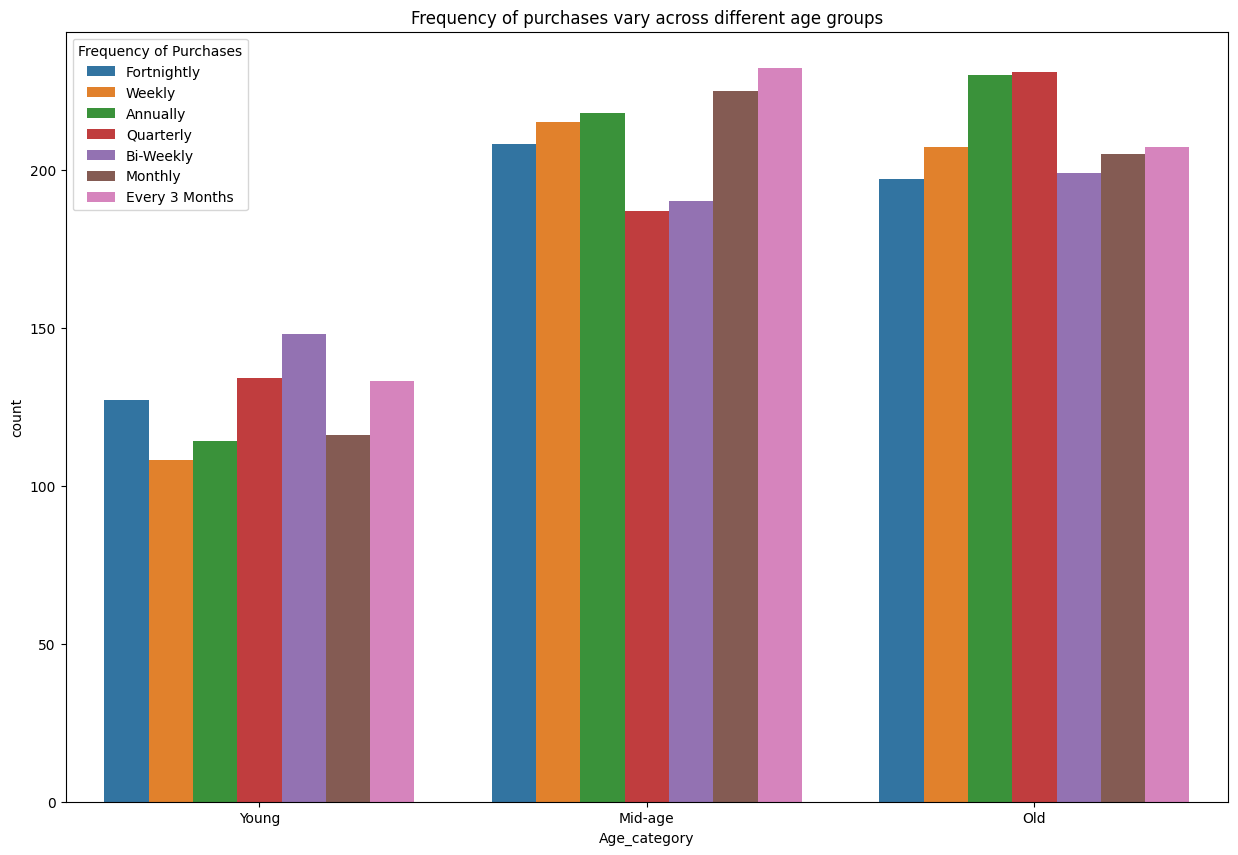

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Age_category', hue='Frequency of Purchases')
plt.title('Frequency of purchases vary across different age groups')
plt.xlabel('Age_category')
plt.show()

The observed trend of higher purchase frequency among the "old" age group can be attributed to several factors. Older individuals may have established spending patterns, greater financial stability, or specific needs that require frequent purchases. Additionally, factors such as retirement, lifestyle choices, and generational differences may contribute to the higher frequency of purchases in this age group.

12. Are there any correlations between the size of the product and the purchase amount?

In [19]:
fig  = px.bar(df, x = 'Size' , y ='Purchase Amount (USD)')
fig.show()

Understanding the correlation between product size and purchase amount can assist businesses in optimizing their product offerings and pricing strategies, ensuring they align with customer preferences and maximize sales potential.

13. Which shipping type is preferred by customers for different product categories?

In [20]:
df.groupby('Category')['Shipping Type'].value_counts()

Category     Shipping Type 
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

14. How does the presence of a discount affect the purchase decision of customers?

In [21]:
df.groupby('Discount Applied')['Purchase Amount (USD)'].count()

Discount Applied
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64

15. Are there any specific colors that are more popular among customers?


In [22]:
df['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

Olive emerged as the most popular color among customers. This earthy and versatile shade appears to resonate well with the customer base, potentially due to its natural and neutral appeal.

16. What is the average number of previous purchases made by customers?

In [23]:
df['Previous Purchases'].mean()

25.35153846153846

Based on the data analysis, it can be concluded that the average number of previous purchases made by customers is approximately 25.35. This average provides insight into the purchasing behavior and loyalty of the customer base.

17. Are there any noticeable differences in purchase behavior between different locations?

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64


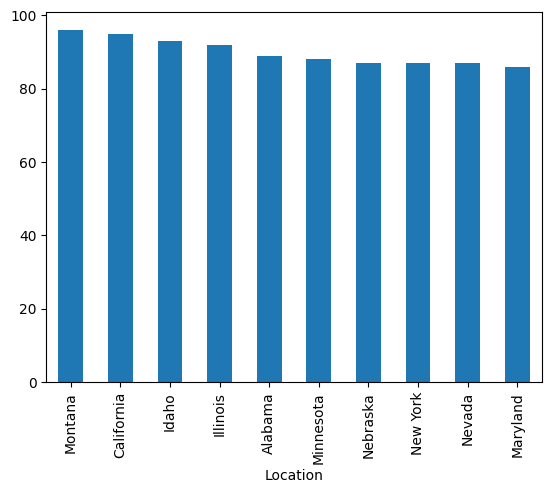

In [24]:
df['Location'].value_counts()[:10].plot(kind='bar')
print(df['Location'].value_counts()[:10])

Location
Montana          5784
Illinois         5617
California       5605
Idaho            5587
Nevada           5514
Alabama          5261
New York         5257
North Dakota     5220
West Virginia    5174
Nebraska         5172
Name: Purchase Amount (USD), dtype: int64


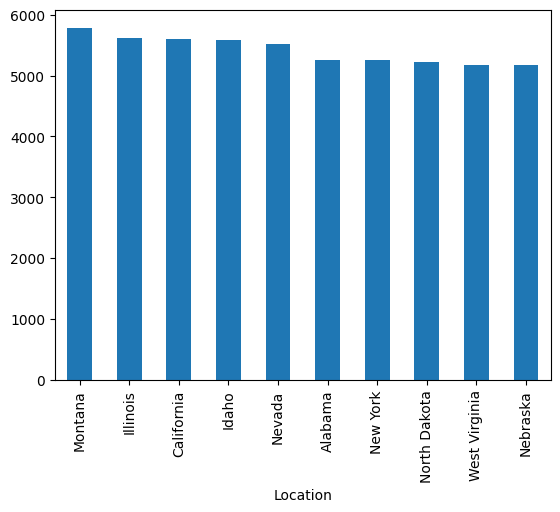

In [25]:
#Montana has highest no of sale as well as highest amount of sales
df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = False)[:10].plot(kind='bar')
print(df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = False)[:10])

18. Is there a relationship between customer age and the category of products they purchase?

<Axes: xlabel='Category', ylabel='count'>

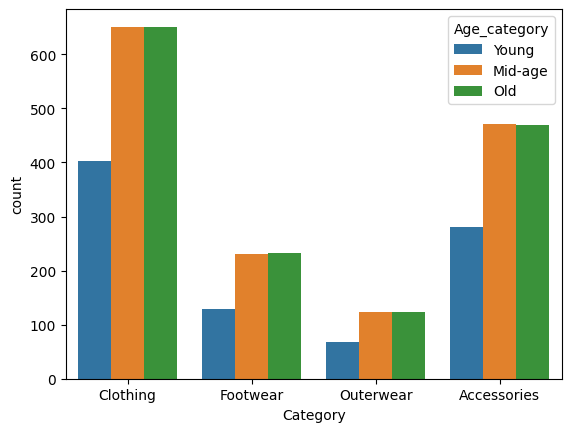

In [26]:
sns.countplot(data=df, x='Category', hue='Age_category')

19. How does the average purchase amount differ between male and female customers?

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


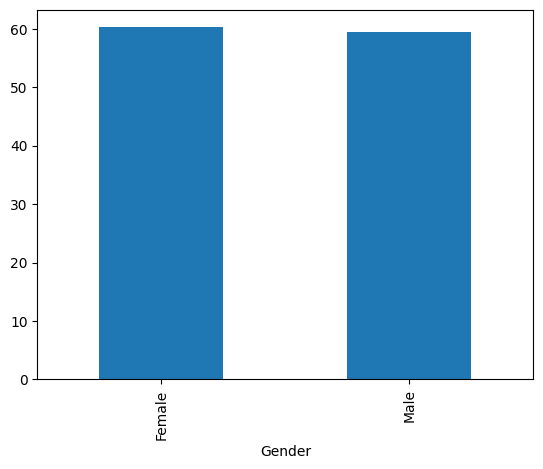

In [27]:
df.groupby('Gender')['Purchase Amount (USD)'].mean().plot(kind='bar')
print(df.groupby('Gender')['Purchase Amount (USD)'].mean())

Not much difference between male & female

# Conclusion & Discussion

The analysis unfolded in three main stages: Data Preparation, Data Analysis, and Data Visualization. These stages played a pivotal role in revealing valuable insights about shopping trend, addressing key business questions and challenges.

In conclusion, these discoveries are essential for industry advisors and decision-makers in shaping strategies for fashion acquisition, creation, and distribution on the platform.